In [1]:
import time

# This notebook requires the 3rd-party modules numpy, scipy and matplotlib to run
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# About this Notebook
This notebook is intended to help explain time complexity and how we can analyze it using a simple example. It was created with Lab1 of DVGB03 (Data Structures and Algorithms) in mind.

To run cells: Shift + Enter

Author: Simon Sundberg

## Outline
- ### [Functions to analyze](#cumsum_funcs)
- ### [Benchmarking](#benchmarking)
- ### [Analysis](#analysis)
  - #### [Time complexities](#complexities)
  - #### [Table](#table)
  - #### [Least squares fitting](#least_squares)
  - #### [Plotting](#plotting)
- ### [Try it yourself](#try_it)
  - #### [Code block](#code_block)

## Our functions to analyze <a id="cumsum_funcs"/>

In [2]:
def cumulative_sum_naive(values):
    """
    Calculates the cumulative sum of values in a naive way.
    For each index summing of the values of all previous indices
    """
    csum = list()
    for i in range(len(values)):  # for(i=0; i < len(values); i++)
        tot = 0
        for j in range(i+1):        # for(j=0, j <= i; j++)
            tot += values[j]
        csum.append(tot)
    return csum

def cumulative_sum_optimized(values):
    """
    Calculates the cumulative sum of values in a smarter way
    For each index, add the value of the index to the value of the cumulative sum from the previous index
    """
    csum = list()
    for i in range(len(values)):
        prev_sum = 0 if i == 0 else csum[i-1]
        csum.append(prev_sum+values[i])
    return csum

In [3]:
cumulative_sum_naive((5, 1, 13))

[5, 6, 19]

In [4]:
cumulative_sum_naive(range(10))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

In [5]:
cumulative_sum_optimized(range(10))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

## Benchmarking function <a id="benchmarking"/>

In [6]:
def warmup(loops=1000000):
    """Dummy func to get the processor up to speed before starting test"""
    tot = 0
    for i in range(loops):
        tot += 1
    return tot

def time_func(func, iterations=4, *args, **kwargs):
    """
    Runs func(*args, **kwargs) iteration times, timing each run
    """
    times = list()
    warmup()
    for i in range(iterations):
        start = time.process_time()
        func(*args, **kwargs)
        end = time.process_time()
        times.append(end - start)
    return times


def benchmark_range_funcs(func, sizes=(1000), iterations=4, agg_func=np.mean, verbose=False):
    """
    Benchmarks any type of function which takes a sequence of values as its first argument
    """
    times = list()
    for s in sizes:
        values = list(range(s))
        times.append(agg_func(time_func(func, iterations, values)))
        if verbose:
            print("Done with size {}".format(s))
    return times

In [7]:
time_func(cumulative_sum_naive, values=range(100))

[0.000726489999999913,
 0.0007169810000000609,
 0.0007163729999999369,
 0.0007160600000000183]

In [8]:
sizes = [128 * 2**n for n in range(7)]
sizes

[128, 256, 512, 1024, 2048, 4096, 8192]

In [9]:
%%time
# This one can take a little while...
times_naive = benchmark_range_funcs(cumulative_sum_naive, sizes, verbose=True)

Done with size 128
Done with size 256
Done with size 512
Done with size 1024
Done with size 2048
Done with size 4096
Done with size 8192
CPU times: user 19.5 s, sys: 0 ns, total: 19.5 s
Wall time: 19.7 s


In [10]:
%%time
times_optimized = benchmark_range_funcs(cumulative_sum_optimized, sizes, verbose=True)

Done with size 128
Done with size 256
Done with size 512
Done with size 1024
Done with size 2048
Done with size 4096
Done with size 8192
CPU times: user 485 ms, sys: 0 ns, total: 485 ms
Wall time: 493 ms


In [11]:
times_naive

[0.0008088062500000159,
 0.0031551244999999395,
 0.012640435999999977,
 0.052821599,
 0.21808901274999987,
 0.8916799254999997,
 3.5765688179999997]

In [12]:
times_optimized

[3.614025000064913e-05,
 6.76469999989493e-05,
 0.00013178099999944237,
 0.0002579217500002784,
 0.000509383000000696,
 0.001012104250000867,
 0.0020432667499994395]

In [13]:
def plot_runtimes(sizes, times, label=None):
    if len(times) != len(sizes):
        raise ValueError("times and sizes must be of the same size")
    
    fig, axes = plt.subplots(figsize=(6, 4))
    axes.plot(sizes, times, "o-")
    axes.set_title(label)

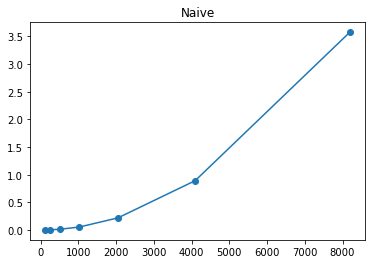

In [14]:
plot_runtimes(sizes, times_naive, label="Naive")

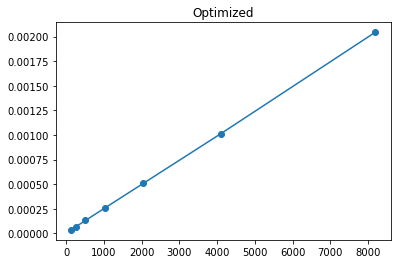

In [15]:
plot_runtimes(sizes, times_optimized, label="Optimized")

## Analysis <a id="analysis"/>

### Time complexities <a id="complexities"/>
Have defined the most common time complexities below. Through some numpy magic they work for both scalars and sequences (i.e. O_n2(3) -> 9 and O_n2(\[1, 2, 3\]) -> \[1, 4, 9\]).

The ones I have implemented are:
- $ \mathcal{O}(1) $
- $ \mathcal{O}(\log n) $
- $ \mathcal{O}(n) $
- $ \mathcal{O}(n\log n) $
- $ \mathcal{O}(n^2) $
- $ \mathcal{O}(n^3) $

Also, I just kinda wanted to show that you can do $\LaTeX$ math in notebooks

In [16]:
def O_1(n):
    """Constant"""
    if np.isscalar(n):
        return 1.0
    return np.ones(np.shape(n))

def O_logn(n):
    """Logarithmic"""
    return np.log(n)

def O_n(n):
    """Linear"""
    # return n
    return np.multiply(n, 1)

def O_nlogn(n):
    """Linearihmic"""
    return n*np.log(n)

def O_n2(n):
    """Quadratic"""
    return np.power(n, 2)

def O_n3(n):
    """Cubic"""
    return np.power(n, 3)

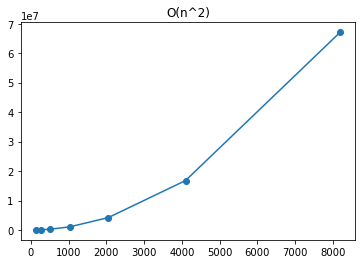

In [17]:
# Example
plot_runtimes(sizes, O_n2(sizes), label="O(n^2)")

### Table-based analysis <a id="table"/>
Printing out a table in similar format as expected from Lab 1

In each cell we divide the runtime $t$ for size $n$ with a corresponding run-time complexity $O$. If a column seems to converge to a value, it means the runtime increases in a similar manner as the time complexity of that column. Ex, if runtime $t$ quadruples when $n$ doubles, then it will grow at the same rate as $O(n^2)$.

In [18]:
def print_table_header(complexities=(), size_width=6, time_width=11):
    header_str = "{:>{w1}.{w1}}  {:>{w2}.{w2}}  ".format("SIZE", "TIME", w1=size_width, w2=time_width)
    for comp in complexities:
        header_str += "{:>{w}.{w}}  ".format("T/"+comp.__name__, w=time_width)
    print("#" * len(header_str))
    print(header_str)
    print("-" * len(header_str))
    return len(header_str)

def print_result_row(size, time, complexities=(), size_width=6, time_width=11):
    row_str = "{:{w1}d}  {:.{w2}e}  ".format(size, time, w1=size_width, w2=time_width-6)
    for comp in complexities:
        row_str += "{:.{w}e}  ".format(time/comp(size), w=time_width-6)
    print(row_str)
    return len(row_str)
    
def print_result_table(sizes, times, complexities=(), size_width=6, time_width=11):
    width = print_table_header(complexities, size_width, time_width)
    for s, t in zip(sizes, times):
        print_result_row(s, t, complexities, size_width=size_width, time_width=time_width)
    print("#" * width)
    return width

In [19]:
print("Result for naive cumulative sum")
print_result_table(sizes, times_naive, complexities=(O_1, O_logn, O_n, O_nlogn, O_n2, O_n3))

Result for naive cumulative sum
###################################################################################################
  SIZE         TIME        T/O_1     T/O_logn        T/O_n    T/O_nlogn       T/O_n2       T/O_n3  
---------------------------------------------------------------------------------------------------
   128  8.08806e-04  8.08806e-04  1.66694e-04  6.31880e-06  1.30230e-06  4.93656e-08  3.85669e-10  
   256  3.15512e-03  3.15512e-03  5.68985e-04  1.23247e-05  2.22260e-06  4.81434e-08  1.88060e-10  
   512  1.26404e-02  1.26404e-02  2.02625e-03  2.46884e-05  3.95753e-06  4.82194e-08  9.41786e-11  
  1024  5.28216e-02  5.28216e-02  7.62055e-03  5.15836e-05  7.44194e-06  5.03746e-08  4.91939e-11  
  2048  2.18089e-01  2.18089e-01  2.86033e-02  1.06489e-04  1.39664e-05  5.19965e-08  2.53889e-11  
  4096  8.91680e-01  8.91680e-01  1.07202e-01  2.17695e-04  2.61723e-05  5.31483e-08  1.29757e-11  
  8192  3.57657e+00  3.57657e+00  3.96915e-01  4.36593e-04  4.84516e

99

In [20]:
print("Result for optimized cumulative sum")
print_result_table(sizes, times_optimized, complexities=(O_1, O_logn, O_n, O_nlogn, O_n2, O_n3))

Result for optimized cumulative sum
###################################################################################################
  SIZE         TIME        T/O_1     T/O_logn        T/O_n    T/O_nlogn       T/O_n2       T/O_n3  
---------------------------------------------------------------------------------------------------
   128  3.61403e-05  3.61403e-05  7.44848e-06  2.82346e-07  5.81912e-08  2.20583e-09  1.72330e-11  
   256  6.76470e-05  6.76470e-05  1.21992e-05  2.64246e-07  4.76533e-08  1.03221e-09  4.03208e-12  
   512  1.31781e-04  1.31781e-04  2.11244e-05  2.57385e-07  4.12586e-08  5.02705e-10  9.81845e-13  
  1024  2.57922e-04  2.57922e-04  3.72102e-05  2.51877e-07  3.63381e-08  2.45973e-10  2.40208e-13  
  2048  5.09383e-04  5.09383e-04  6.68077e-05  2.48722e-07  3.26209e-08  1.21446e-10  5.93000e-14  
  4096  1.01210e-03  1.01210e-03  1.21680e-04  2.47096e-07  2.97070e-08  6.03261e-11  1.47281e-14  
  8192  2.04327e-03  2.04327e-03  2.26755e-04  2.49422e-07  2.76

99

### Least squares fitting <a id="least_squares"/>
A more sophisticated way to test how well the run times match a given complexity is to use least squares fitting. We will not do that in this lab, and stick to the simplier table-based approach. But I provide it here as an example. The fitted curve will have a similar constant value $c$ as the tables above will converge to.

In [21]:
def fit_complexity_curve(sizes, times, complexity_func=O_1):
    """
    Calculates the constant that best fits a complexity class to the provided data 
    and the resulting residual
    """
    f = lambda x, c: c * complexity_func(x)
    c = scipy.optimize.curve_fit(f, sizes, times)[0][0]
    return c, calculate_residual(sizes, times, complexity_func, c)

def calculate_residual(sizes, times, complexity_func, c):
    """
    Calculates the least-squares residual between a fitted curve and the data
    """
    return np.sum(np.subtract(times, c * complexity_func(sizes))**2)

print("Naive - O(n^2), c: {:.5e}".format(fit_complexity_curve(sizes, times_naive, complexity_func=O_n2)[0]))
print("Optimized - O(n),  c: {:.5e}".format(fit_complexity_curve(sizes, times_optimized, complexity_func=O_n)[0]))

Naive - O(n^2), c: 5.32809e-08
Optimized - O(n),  c: 2.49022e-07


### Plotting <a id="plotting">

In [24]:
def plot_results(sizes, times, complexities=(), ax=None, marker="o", linestyle="None", **kwargs):
    """
    Plots the time vs size, and optionally fits a number of time complexities
    """
    if ax is None:
        ax = plt.gca()
        
    if len(sizes) > 0:
        sizes = np.asarray(sizes)
        times = np.asarray(times)
        ax.plot(sizes, times, marker=marker, linestyle=linestyle, label="Result", zorder=3, **kwargs)
        smooth_sizes = np.linspace(np.amin(sizes), np.amax(sizes), 100)
        for comp in complexities:
            c, err = fit_complexity_curve(sizes, times, comp)
            ax.plot(smooth_sizes, c * comp(smooth_sizes), alpha=0.8, 
                    label="{} - err: {:.2e}".format(comp.__name__, err))
        ax.legend()
    ax.set_xlabel("Size")
    ax.set_ylabel("Time (s)")
    ax.axhline(c="k", zorder=1)
    return axes

Text(0.5, 1.0, 'Naive cumulative sum')

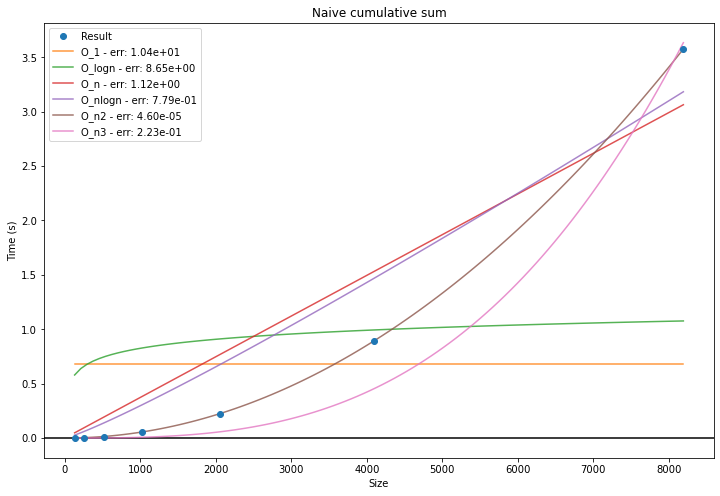

In [25]:
fig, axes = plt.subplots(figsize=(12, 8))
plot_results(sizes, times_naive, complexities=(O_1, O_logn, O_n, O_nlogn, O_n2, O_n3), ax=axes)
axes.set_title("Naive cumulative sum")
#fig.savefig("complexity_analysis_cumulative_sum_naive.png", bbox_inches="tight", dpi=300)

Text(0.5, 1.0, 'Optimized cumulative sum')

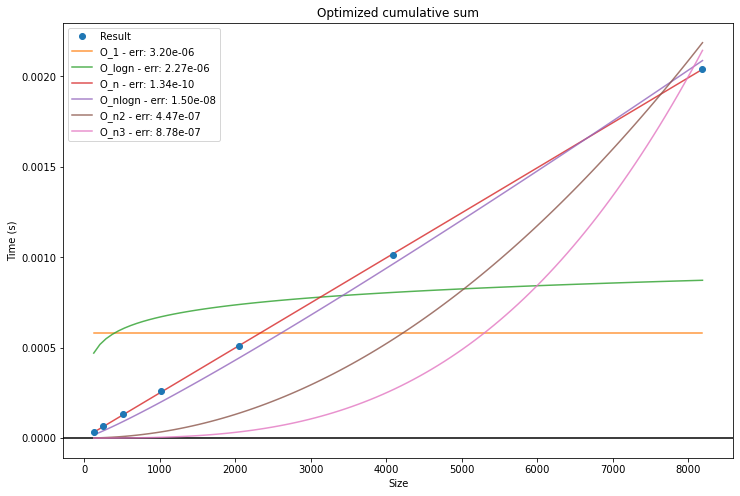

In [26]:
fig, axes = plt.subplots(figsize=(12, 8))
plot_results(sizes, times_optimized, complexities=(O_1, O_logn, O_n, O_nlogn, O_n2, O_n3), ax=axes)
axes.set_title("Optimized cumulative sum")
#fig.savefig("complexity_analysis_cumulative_sum_optimized.png", bbox_inches="tight", dpi=300)

## Try it yourself <a id="try_it"/>
If you want, you can throw in your own numbers here. If you haven't run the previous part of the notebook, please run the [code block](#code_block) first.

###################################################################################################
  SIZE         TIME        T/O_1     T/O_logn        T/O_n    T/O_nlogn       T/O_n2       T/O_n3  
---------------------------------------------------------------------------------------------------
###################################################################################################


<AxesSubplot:xlabel='Size', ylabel='Time (s)'>

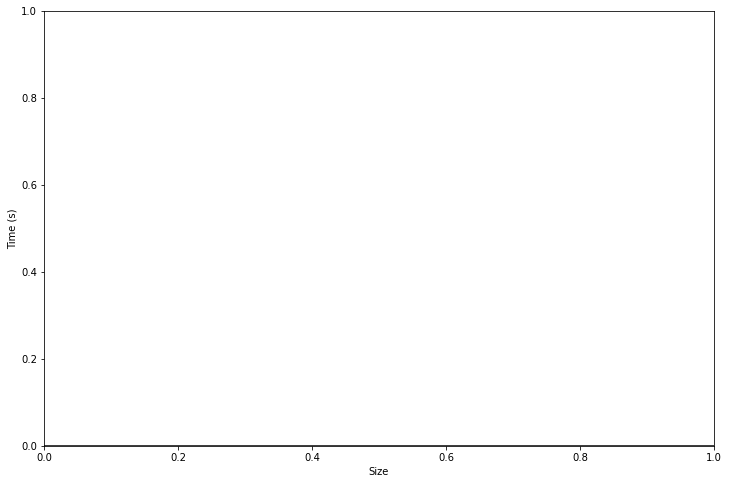

In [27]:
times = [] # Fill in run times, ex [1.2e-9, 2.4e-8, 4.9e-7]
sizes = [] # Fill in sizes, ex [512, 1024, 2048]


print_result_table(sizes, times, complexities=(O_1, O_logn, O_n, O_nlogn, O_n2, O_n3))
fig, axes = plt.subplots(figsize=(12, 8))
plot_results(sizes, times, complexities=(O_1, O_logn, O_n, O_nlogn, O_n2, O_n3), ax=axes)
#fig.savefig("<figue_name.extension>", bbox_inches="tight")

### Code block <a id="code_block"/>
All the functions required for the analysis part collected in one place

In [28]:
# Complexity functions
def O_1(n):
    """Constant"""
    if np.isscalar(n):
        return 1.0
    return np.ones(np.shape(n))

def O_logn(n):
    """Logarithmic"""
    return np.log(n)

def O_n(n):
    """Linear"""
    # return n
    return np.multiply(n, 1)

def O_nlogn(n):
    """Linearihmic"""
    return n*np.log(n)

def O_n2(n):
    """Quadratic"""
    return np.power(n, 2)

def O_n3(n):
    """Cubic"""
    return np.power(n, 3)


# Table functions
def print_table_header(complexities=(), size_width=6, time_width=11):
    header_str = "{:>{w1}.{w1}}  {:>{w2}.{w2}}  ".format("SIZE", "TIME", w1=size_width, w2=time_width)
    for comp in complexities:
        header_str += "{:>{w}.{w}}  ".format("T/"+comp.__name__, w=time_width)
    print("#" * len(header_str))
    print(header_str)
    print("-" * len(header_str))
    return len(header_str)

def print_result_row(size, time, complexities=(), size_width=6, time_width=11):
    row_str = "{:{w1}d}  {:.{w2}e}  ".format(size, time, w1=size_width, w2=time_width-6)
    for comp in complexities:
        row_str += "{:.{w}e}  ".format(time/comp(size), w=time_width-6)
    print(row_str)
    return len(row_str)
    
def print_result_table(sizes, times, complexities=(), size_width=6, time_width=11):
    width = print_table_header(complexities, size_width, time_width)
    for s, t in zip(sizes, times):
        print_result_row(s, t, complexities, size_width=size_width, time_width=time_width)
    print("#" * width)
    return width


# Least squares fitting
def fit_complexity_curve(sizes, times, complexity_func=O_1):
    """
    Calculates the constant that best fits a complexity class to the provided data 
    and the resulting residual
    """
    f = lambda x, c: c * complexity_func(x)
    c = scipy.optimize.curve_fit(f, sizes, times)[0][0]
    return c, calculate_residual(sizes, times, complexity_func, c)

def calculate_residual(sizes, times, complexity_func, c):
    """
    Calculates the least-squares residual between a fitted curve and the data
    """
    return np.sum(np.subtract(times, c * complexity_func(sizes))**2)


# Plotting (requires the least square fitting)
def plot_results(axes, sizes, times, complexities=(), marker="o", linestyle="None", **kwargs):
    """
    Plots the time vs size, and optionally fits a number of time complexities
    """
    if len(sizes) > 0:
        sizes = np.asarray(sizes)
        times = np.asarray(times)
        axes.plot(sizes, times, marker=marker, linestyle=linestyle, label="Result", zorder=3, **kwargs)
        smooth_sizes = np.linspace(np.amin(sizes), np.amax(sizes), 100)
        for comp in complexities:
            c, err = fit_complexity_curve(sizes, times, comp)
            axes.plot(smooth_sizes, c * comp(smooth_sizes), alpha=0.5, 
                      label="{} - err: {:.2e}".format(comp.__name__, err))
        axes.legend()
    axes.set_xlabel("Size")
    axes.set_ylabel("Time (s)")
    axes.axhline(c="k", zorder=1)